In [8]:
!pip uninstall -y numpy
!pip uninstall -y setuptools
!pip install setuptools --use-deprecated=legacy-resolver
!pip install numpy --use-deprecated=legacy-resolver

Found existing installation: numpy 1.26.2
Uninstalling numpy-1.26.2:
  Successfully uninstalled numpy-1.26.2
Found existing installation: setuptools 69.0.2
Uninstalling setuptools-69.0.2:
  Successfully uninstalled setuptools-69.0.2
  Using cached setuptools-69.0.2-py3-none-any.whl (819 kB)
ERROR: pip's legacy dependency resolver does not consider dependency conflicts when selecting packages. This behaviour is the source of the following dependency conflicts.
arviz 0.15.1 requires numpy>=1.20.0, which is not installed.
cufflinks 0.17.3 requires numpy>=1.9.2, which is not installed.
cvxpy 1.3.2 requires numpy>=1.15, which is not installed.
datascience 0.17.6 requires numpy, which is not installed.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires numpy, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
mlxtend 0.22.0 re

  Using cached numpy-1.26.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
ERROR: pip's legacy dependency resolver does not consider dependency conflicts when selecting packages. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
cupy-cuda11x 11.0.0 requires numpy<1.26,>=1.20, but you'll have numpy 1.26.2 which is incompatible.


In [1]:
!pip install pyLDAvis

In [2]:
!pip install pyvis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

import re

import warnings
warnings.filterwarnings('ignore')

#from sklearn.manifold import TSNE

warnings.filterwarnings("ignore")

In [4]:
import pyvis
import numpy as np
from nltk.tokenize.regexp import RegexpTokenizer
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

np.random.seed(2018)
import nltk
nltk.download('wordnet')

# Gensim
import gensim, logging, warnings
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

import spacy
nlp = spacy.load('en_core_web_sm')

warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

from nltk import PorterStemmer
stemmer = PorterStemmer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
data = pd.read_csv("cleaned_tweets.csv", index_col = None)

In [7]:
data.head()

,tweet_created,airline_sentiment,negativereason,text
0,24/02/15 11:35,neutral,NaN,What dhepburn say
1,24/02/15 11:15,positive,NaN,plus add commercial experience tacky
2,24/02/15 11:15,neutral,NaN,today Must mean need take another trip
3,24/02/15 11:15,negative,Bad Flight,really aggressive blast obnoxious entertainmen...
4,24/02/15 11:14,negative,Can't Tell,really thing


In [8]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True)
        yield(sent)

In [9]:
# Convert to list
data = data.text.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1])

[['what', 'dhepburn', 'say']]


In [10]:
len(data_words)

499

In [11]:
data_words

[['what', 'dhepburn', 'say'],
 ['plus', 'add', 'commercial', 'experience', 'tacky'],
 ['today', 'must', 'mean', 'need', 'take', 'another', 'trip'],
 ['really',
  'aggressive',
  'blast',
  'obnoxious',
  'entertainment',
  'guest',
  'face',
  'little',
  'recourse'],
 ['really', 'thing'],
 ['seriously', 'would', 'flight', 'seat', 'play', 'really', 'thing', 'fly'],
 ['nearly', 'every', 'time', 'virgin', 'away'],
 ['really', 'miss', 'prime', 'opportunity', 'without', 'hats', 'parody'],
 ['well'],
 ['amaze', 'arrive', 'hour', 'early', 'good'],
 ['know', 'suicide', 'second', 'lead', 'death', 'among', 'teen'],
 ['pretty', 'graphic', 'much', 'well', 'minimal', 'iconography'],
 ['this',
  'great',
  'deal',
  'already',
  'think',
  'trip',
  'australia',
  'amp',
  'even',
  'go',
  'trip'],
 ['fly', 'fabulous', 'seductive', 'sky', 'take', 'stress', 'away', 'travel'],
 ['thanks'],
 ['sfo', 'pdx', 'schedule', 'still'],
 ['excite',
  'first',
  'cross',
  'country',
  'flight',
  'heard',
  '

In [12]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)
print(id2word)

Dictionary<1291 unique tokens: ['dhepburn', 'say', 'what', 'add', 'commercial']...>


In [13]:
# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_words]
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1)]]


In [14]:
dictionary = corpora.Dictionary(data_words)
text_term_matrix = [dictionary.doc2bow(text) for text in data_words]

In [15]:
for i in range(len(data_words)):
    data_words[i] = [word.lower() for word in data_words[i] if re.match('^[a-zA-Z]+', word)]

## Build the Topic Model

In [16]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

In [17]:
print( lda_model.print_topics())

[(0, '0.032*"thanks" + 0.031*"still" + 0.020*"route" + 0.016*"ticket" + 0.015*"wish" + 0.014*"cabin" + 0.014*"really" + 0.012*"awesome" + 0.012*"carry" + 0.010*"year"'), (1, '0.076*"flight" + 0.038*"virgin" + 0.021*"help" + 0.020*"seat" + 0.020*"love" + 0.018*"plane" + 0.013*"austin" + 0.012*"time" + 0.011*"would" + 0.011*"cancelled"'), (2, '0.022*"customer" + 0.022*"change" + 0.019*"airline" + 0.017*"your" + 0.017*"come" + 0.017*"amp" + 0.016*"home" + 0.013*"best" + 0.012*"try" + 0.012*"say"'), (3, '0.026*"make" + 0.023*"point" + 0.018*"elevate" + 0.017*"guy" + 0.017*"next" + 0.015*"look" + 0.014*"contact" + 0.013*"site" + 0.012*"status" + 0.011*"soon"')]


In [18]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

In [19]:
vis = gensimvis.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.222499  0.011610       1        1  34.297675
2     -0.090847  0.152047       2        1  23.686416
3     -0.068325 -0.173264       3        1  21.996615
0     -0.063327  0.009607       4        1  20.019294, topic_info=            Term       Freq      Total Category  logprob  loglift
25        flight  89.000000  89.000000  Default  30.0000  30.0000
35        virgin  45.000000  45.000000  Default  29.0000  29.0000
74        thanks  22.000000  22.000000  Default  28.0000  28.0000
78         still  21.000000  21.000000  Default  27.0000  27.0000
114         make  20.000000  20.000000  Default  26.0000  26.0000
...          ...        ...        ...      ...      ...      ...
1121     channel   5.350173   7.416835   Topic4  -4.8576   1.2819
1284         dev   4.460562   6.278633   Topic4  -5.0395   1.2666
1285  starryeyes   4.460562   6.278633   Topic4  -5.0395   1.2666
531          pay   3.843424   5.084041   Topic4  -5.1884   1.3287
1273    amazings   3.626783   5.005999   Topic4  -5.2464   1.2862

[168 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
132       3  0.987213      able
197       2  0.977428   airline
1273      2  0.199760  amazings
1273      4  0.799041  amazings
61        2  0.984252       amp
...     ...       ...       ...
894       3  0.956305    wonder
206       2  0.869682      work
30        1  0.927820     would
186       4  0.916713      year
207       2  0.946741      your

[156 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 4, 1])

## Word Count and Importance of Keywords

In [24]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_words for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


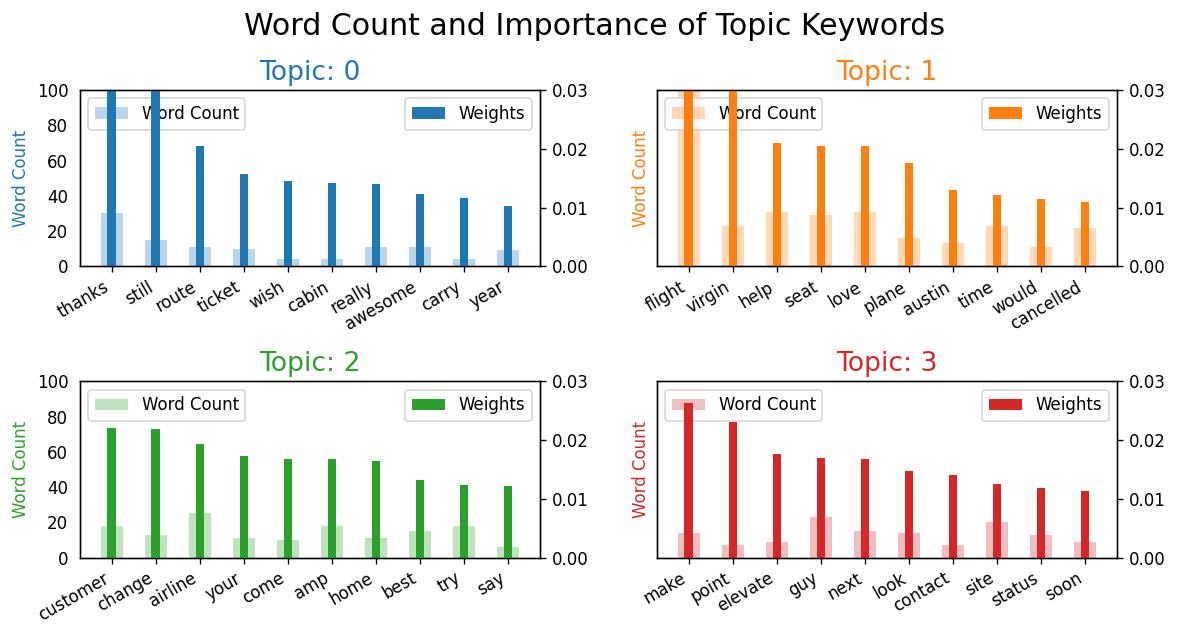

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(10,5), sharey=True, dpi=120)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 100)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=18, y=1.05)
plt.show()

## Sentence Topic Colouring

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


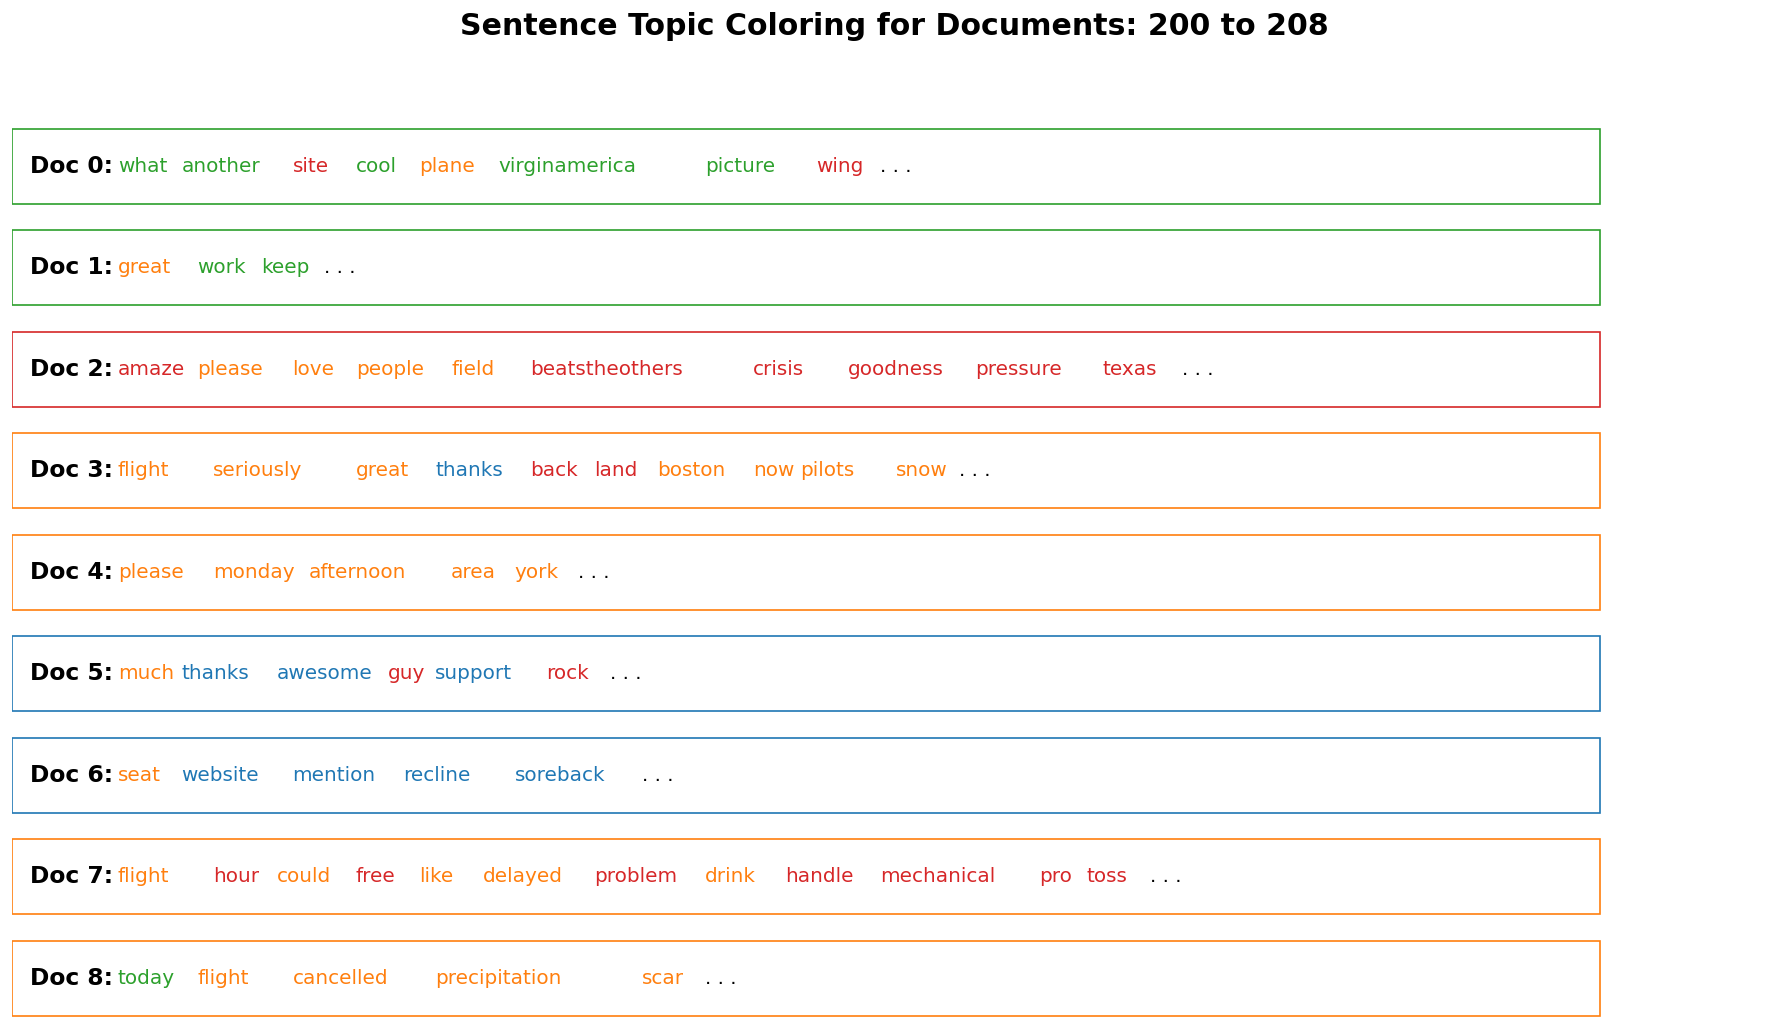

In [27]:
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=corpus, start = 200, end = 210):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(15, (end-start)*0.90), dpi=120)
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1]
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=14, color='black', transform=ax.transAxes, fontweight=700)


            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.90, 0.90, fill=None, alpha=1,
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=1))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=12, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=400)
                    word_pos += .009 * len(word)
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=12, color='black',
                    transform=ax.transAxes)

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=18, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart()

In [28]:
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook


topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])


arr = pd.DataFrame(topic_weights).fillna(0).values

arr = arr[np.amax(arr, axis=1) > 0.35]

topic_num = np.argmax(arr, axis=1)

tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics))
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 495 samples in 0.001s...
[t-SNE] Computed neighbors for 495 samples in 0.013s...
[t-SNE] Computed conditional probabilities for sample 495 / 495
[t-SNE] Mean sigma: 0.095177
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.526352
[t-SNE] KL divergence after 1000 iterations: 0.360979
